In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10000

In [3]:
ip1 = np.random.rand(N) > 0.5
ip1 = ip1.astype(int)

In [4]:
ip2 = np.random.rand(N) > 0.5
ip2 = ip1.astype(int)

In [5]:
E_symbol_avg = 1

In [6]:
s = (1/np.sqrt(2)) * ((2*ip1 - 1) + 1j*(2*ip2 - 1))

# for ii in range(len(s)):
    
#     print(s[ii])
#     print(np.real(s[ii]) > 0)
#     print(np.imag(s[ii]) > 0)

In [7]:
eb_no_db = np.arange(0,30)

In [8]:
bit_error_SC = np.zeros(len(eb_no_db))
bit_error_MRC = np.zeros(len(eb_no_db))
bit_error_ALAMOUTI = np.zeros(len(eb_no_db))

In [9]:
def SC():
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits_real = []
        
        equalize_bits_imag = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            x = s[ii]
            
            y1 = np.dot(h11, x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            y2 = np.dot(h21, x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            h11_gain = np.abs(h11)
            
            h21_gain = np.abs(h21)
            
            if h11_gain > h21_gain:
                
                transmitted_channel = h11
                
                received_signal = y1
                
                received_signal = y1/transmitted_channel
                
                w_real = np.real(received_signal) > 0
                
                equalize_bits_real.append(w_real)
                
                w_imag =  np.imag(received_signal) > 0
                
                equalize_bits_imag.append(w_imag)
                
#                 if np.real(received_signal< 0) and np.imag(received_signal < 0):
#                     equalize_bits.append(0)
#                     equalize_bits.append(0)
#                 elif np.real(received_signal < 0) and np.imag(received_signal >= 0):
#                     equalize_bits.append(0)
#                     equalize_bits.append(1)
#                 elif np.real(received_signal >= 0) and np.imag(received_signal < 0):
#                     equalize_bits.append(1)
#                     equalize_bits.append(0)
#                 elif np.real(received_signal) >= 0 and np.imag(received_signal) >= 0:
#                     equalize_bits.append(1)
#                     equalize_bits.append(1)
            else:
        
                transmitted_channel = h21
            
                received_signal = y2
                
                received_signal = y2/transmitted_channel
                
                w_real = np.real(received_signal) > 0
                
                equalize_bits_real.append(w_real)
                
                w_imag =  np.imag(received_signal) > 0
                
                equalize_bits_imag.append(w_imag)
                
#                 if np.real(received_signal) < 0 and np.imag(received_signal) < 0:
#                     equalize_bits.append(0)
#                     equalize_bits.append(0)
#                 elif np.real(received_signal) < 0 and np.imag(received_signal) >= 0:
#                     equalize_bits.append(0)
#                     equalize_bits.append(1)
#                 elif np.real(received_signal) >= 0 and np.imag(received_signal) < 0:
#                     equalize_bits.append(1)
#                     equalize_bits.append(0)
#                 elif np.real(received_signal) >= 0 and np.imag(received_signal) >= 0:
#                     equalize_bits.append(1)
#                     equalize_bits.append(1)
        nErr1 = np.sum(ip1 != equalize_bits_real)
    
        nErr2 = np.sum(ip2 != equalize_bits_imag)
        
        nErr = nErr1 + nErr2
        
        bit_error_SC[jj] = nErr/N
        
    return bit_error_SC


In [10]:
def MRC():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits_real = []
        
        equalize_bits_imag = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            H = np.array([[h11], [h21]])
            
            n = np.array([[n11], [n21]])
            
            x = s[ii]
            
            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            hermitian_H = np.conjugate(H)
            
            hermitian_H = np.transpose(hermitian_H)
            
            magnitude_H = np.dot(hermitian_H,H)
            
            x_tilde = np.divide(np.dot(hermitian_H,y),magnitude_H)
            
            w_real = np.real(x_tilde) > 0
            
            w_real =w_real[0,0].astype(int)
            
            equalize_bits_real.append(w_real)
            
            w_imag = np.imag(x_tilde) > 0
            
            w_imag = w_imag[0,0].astype(int)
            
            equalize_bits_imag.append(w_imag)    
            
            
        nErr1 = np.sum(ip1 != equalize_bits_real)
        
        nErr2 = np.sum(ip2 != equalize_bits_imag)
        
        nErr = nErr1 + nErr2
        
        bit_error_MRC[jj] = nErr/N
        
    return bit_error_MRC

In [11]:
def alamouti_2Tx_2Rx():
    
    for jj in range(len(eb_no_db)):
        
        total_error = 0
        
        equalize_bits_real_s0 =[]
        
        equalize_bits_imag_s0 = []
        
        equalize_bits_real_s1 = []
        
        equalize_bits_imag_s1 = []
        
        for ii in range(N // 2):
            
            h0 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h3 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n0 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n3 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            s0 = s[2 * ii]
            
            s1 = s[2 * ii + 1]
            
            r0 = h0 * (1 / np.sqrt(2)) * s0 + h1 * (1 / np.sqrt(2)) * s1 + n0 * 10 ** (-eb_no_db[jj] / 20)
            
            r1 = - h0 * (1 / np.sqrt(2)) * np.conj(s1) + h1 * np.conj(s0) + n1 * 10 ** (-eb_no_db[jj] / 20)
            
            r2 = h2 * (1 / np.sqrt(2)) * s0 + h3 * (1 / np.sqrt(2)) * s1 + n2 * 10 ** (-eb_no_db[jj] / 20)
            
            r3 = -h2 * (1 / np.sqrt(2)) * np.conj(s1) + h3 * (1 / np.sqrt(2)) * np.conj(s0) + n3 * 10 ** (-eb_no_db[jj] / 20)
            
            s0_tilde = np.conj(h0) * r0 + h1 * np.conj(r1) + np.conj(h2) * r2 + h3 * np.conj(r3)
            
            s1_tilde = np.conj(h1) * r0 - h0 * np.conj(r1) + np.conj(h3) * r2 - h2 * np.conj(r3)
            
            s0_tilde = s0_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            s1_tilde = s1_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            s0_real = np.real(s0_tilde) > 0
            
            equalize_bits_real_s0.append(s0_real)
            
            s0_imag = np.imag(s0_tilde) > 0
            
            equalize_bits_imag_s0.append(s0_imag)
            
            s1_real = np.real(s1_tilde) > 0
            
            equalize_bits_real_s1.append(s1_real)
            
            s1_imag = np.imag(s1_tilde) > 0
            
            equalize_bits_imag_s1.append(s1_imag)
            
            nErr1 = np.sum(ip1[2*ii] != s0_real )
            
            total_error = total_error + nErr1

            nErr2 = np.sum(ip1[2*ii + 1] != s1_real)
            
            total_error = total_error + nErr2
            
            nErr3 = np.sum(ip2[2*ii] != s0_imag)
            
            total_error = total_error + nErr3
            
            nErr4 = np.sum(ip2[2*ii + 1] != s1_imag)
            
            total_error = total_error + nErr4
            
        bit_error_ALAMOUTI[jj] = total_error / N
        
    return bit_error_ALAMOUTI

In [12]:
def alamouti_2Tx_1Rx () :
    
    for jj in range (len(eb_no_db)):
        
        total_error = 0
        
        equalize_bits_real_s0 =[]
        
        equalize_bits_imag_s0 = []
        
        equalize_bits_real_s1 = []
        
        equalize_bits_imag_s1 = []
        for ii in range (N//2):
            
            h0 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            h1 = (1/ np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            n0 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 


            r0 = h0 * (1/np.sqrt(2))*s[2 * ii] + h1 * (1/np.sqrt(2))* s[2 * ii + 1] + n0 * 10 ** (-eb_no_db[jj] / 20)

            r1 = - h0 * (1/np.sqrt(2)) * np.conj(s[2 * ii + 1]) + h1  * (1/np.sqrt(2)) * np.conj(s[2 * ii]) + n1  * 10 ** (-eb_no_db[jj] / 20)

            s0_tilde = np.conj(h0) * r0 + h1 * np.conj(r1)

            s1_tilde = np.conj(h1) * r0 - h0 * np.conj(r1)



            s0_tilde = s0_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

            s1_tilde = s1_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

            s0_real = np.real(s0_tilde) > 0
            
            equalize_bits_real_s0.append(s0_real)
            
            s0_imag = np.imag(s0_tilde) > 0
            
            equalize_bits_imag_s0.append(s0_imag)
            
            s1_real = np.real(s1_tilde) > 0
            
            equalize_bits_real_s1.append(s1_real)
            
            s1_imag = np.imag(s1_tilde) > 0
            
            equalize_bits_imag_s1.append(s1_imag)
            
            nErr1 = np.sum(ip1[2*ii] != s0_real )
            
            total_error = total_error + nErr1

            nErr2 = np.sum(ip1[2*ii + 1] != s1_real)
            
            total_error = total_error + nErr2
            
            nErr3 = np.sum(ip2[2*ii] != s0_imag)
            
            total_error = total_error + nErr3
            
            nErr4 = np.sum(ip2[2*ii + 1] != s1_imag)
            
            total_error = total_error + nErr4
            
        bit_error_ALAMOUTI[jj] = total_error / N
        
    return bit_error_ALAMOUTI

[3.005e-01 2.494e-01 2.010e-01 1.635e-01 1.274e-01 9.750e-02 7.010e-02
 5.450e-02 3.900e-02 2.880e-02 2.070e-02 1.260e-02 7.400e-03 6.700e-03
 4.600e-03 3.400e-03 2.000e-03 7.000e-04 5.000e-04 2.000e-04 2.000e-04
 1.000e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00]
[2.290e-01 1.871e-01 1.512e-01 1.155e-01 9.100e-02 6.270e-02 4.370e-02
 2.840e-02 2.500e-02 1.690e-02 1.050e-02 7.300e-03 4.000e-03 3.800e-03
 2.000e-03 1.200e-03 7.000e-04 5.000e-04 4.000e-04 3.000e-04 2.000e-04
 4.000e-04 2.000e-04 1.000e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00]
[0.1743 0.1404 0.1068 0.0741 0.0468 0.031  0.0197 0.0123 0.0067 0.0034
 0.0016 0.0011 0.0002 0.0002 0.     0.0002 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
[3.763e-01 3.287e-01 2.824e-01 2.243e-01 1.868e-01 1.551e-01 1.113e-01
 9.320e-02 6.800e-02 4.970e-02 3.270e-02 2.590e-02 1.710e-02 1.240e-02
 7.100e-03 4.800e-03 2.600e-03 1.800

ValueError: Illegal format string "bs^"; two marker symbols

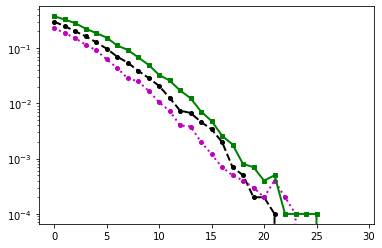

In [13]:
sc = SC()
print(sc)
plt.figure()
mrc = MRC()
print(mrc)
alamouti = alamouti_2Tx_2Rx()
print(alamouti)
alamouti_1Rx = alamouti_2Tx_1Rx ()
print(alamouti_1Rx)
plt.semilogy(eb_no_db, sc, 'ko--', linewidth=2, markersize=4, label='nTx=1 nRx=2 (SC)')
plt.semilogy(eb_no_db, mrc, 'mo:', linewidth=2, markersize=4, label='nTx=1 nRx=2 (MRC)')
plt.semilogy(eb_no_db, alamouti, 'gs-', linewidth=2, markersize=4, label='Alamouti')
plt.semilogy(eb_no_db, alamouti, 'bs^', linewidth=2, markersize=8, label='Alamouti')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for QPSK modulation')
plt.show()